In [1]:
include("biblioteca.jl")
using PyPlot

In [2]:
function  ϕ_matrix(ψj,Q,M)
    ϕ = zeros(Q,M)
    ξ = zglj(Q)
    for i in 1:M
        for j in 1:Q
            ϕ[j,i] = ψj(i,ξ[j],M)
        end
    end
  return ϕ
end

ϕ_matrix (generic function with 1 method)

In [3]:
function Mass_matrix(ϕ,w,M,Q)
    L = zeros(M,M)
    for i in 1:M
        for j in 1:M
           m= 0.0
            for q in 1:Q
                m = m + ϕ[q,i]*ϕ[q,j]*w[q]
            end
            L[i,j] = m
        end
    end
    return L
end

Mass_matrix (generic function with 2 methods)

In [4]:
function ψj(p,E,Q)
    if(p == 1)
     return  (1-E)/2
        elseif(p == 2)
     return  (1+E)/2
    else
     return  (1-E)*(1+E)/4 .* jacobi(E, p-3, 1, 1)
    end
end 

ψj (generic function with 1 method)

In [5]:
function dψj(p,E,Q)
    if(p == 1)
     return  (1-E)/2
        elseif(p == 2)
     return  (1+E)/2
    else
     return  (1-E)*(1+E)/4 .* jacobi(E, p-3, 1, 1)
    end
end 

dψj (generic function with 1 method)

In [6]:
function fr_vector(fun,M,Q)
    fr = zeros(M)
    ξ = zglj(Q)
    for i in 1:M
        temp = 0.0
        for q in 1:Q
            temp = temp + fun(ξ[q])*ϕ[q,i]*w[q]
        end
        fr[i]= temp
    end
    return fr
end

fr_vector (generic function with 1 method)

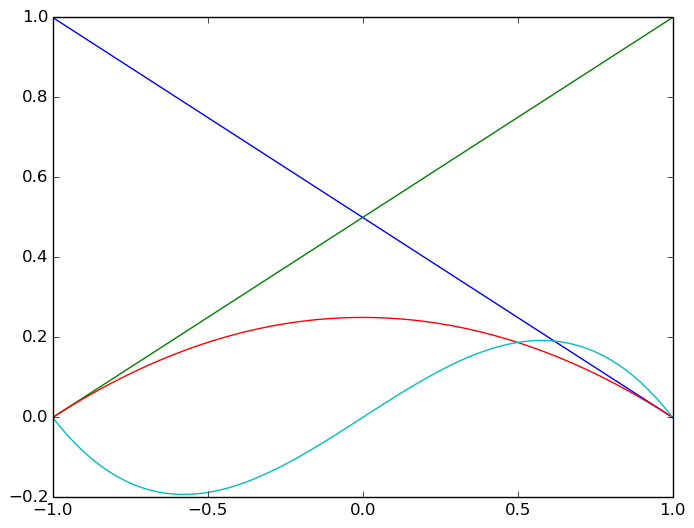

In [7]:

xx = [linspace(-1,1,101);]
for i in 1:4
    plot(xx,[ψj(i,x,4) for x in xx])
end

# Edo, Dirichlet u(-1) = 0 e u(1) = 0

\begin{equation}
   \ u(x) = f(x) \\
   \ \int_\Omega v(x)\ u(x) \partial x = \int_\Omega v(x)\ f(x) \partial x 
\end{equation}

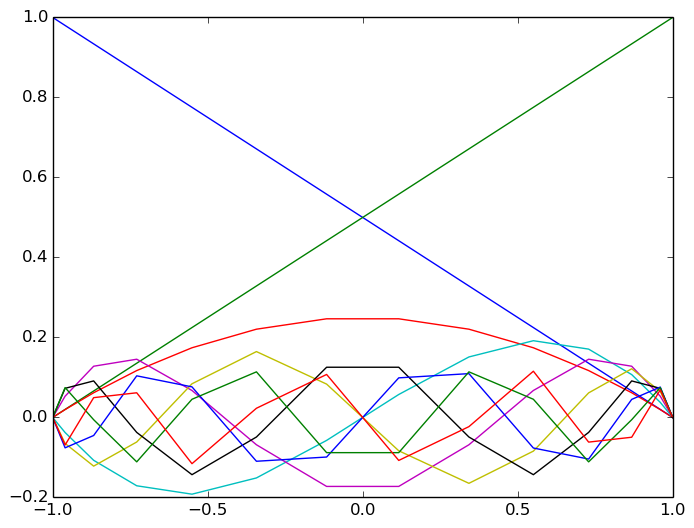

In [13]:
#######################
fun(x) = sin(x*2*pi)
#fun(x) = -x.^2 -2.*x + 5
#######################
Q = 14
I = 10
ξ = zglj(Q)
w = wglj(ξ,0.,0.)
ϕ = ϕ_matrix(ψj,Q,I)
M = Mass_matrix(ϕ,w,I,Q)
for i in 1:I
    plot(ξ,ϕ[:,i])
end

In [14]:
fr= fr_vector(fun,I,Q)

10-element Array{Float64,1}:
  0.159155   
 -0.159155   
 -2.38524e-17
 -0.0241887  
 -1.43115e-17
 -0.118368   
  1.71304e-17
  0.102717   
  3.90313e-18
 -0.0299446  

In [15]:
Mi = M[3:I,3:I]
uhi = Mi\fr[3:I]
uh2 = vcat([0, 0],uhi)

10-element Array{Float64,1}:
  0.0        
  0.0        
 -4.54177e-17
 -2.39223    
 -1.3286e-16 
 -5.27183    
 -1.0555e-16 
  2.89892    
 -2.19987e-16
 -0.678067   

In [16]:
uh = M\fr

10-element Array{Float64,1}:
 -0.0179894  
  0.0179894  
 -1.966e-16  
 -2.47727    
 -2.29827e-16
 -5.33807    
 -1.7632e-16 
  2.85073    
 -2.58419e-16
 -0.704479   

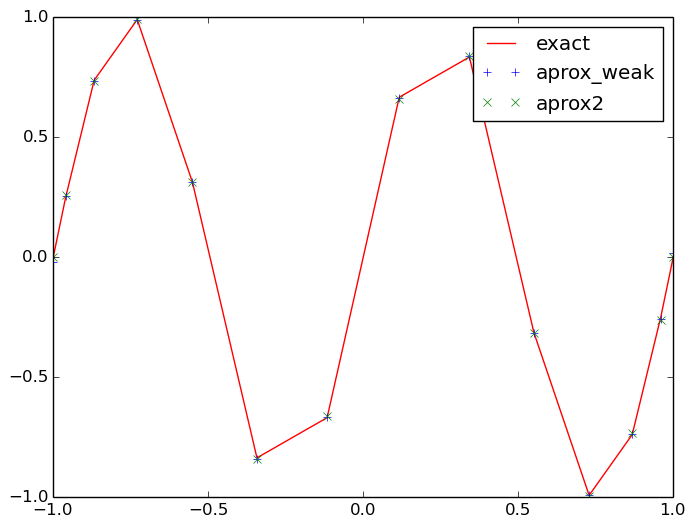

0.0179894357797568

In [17]:
uq1 = ϕ*uh
uq2 = ϕ*uh2
ue = fun(ξ)
plot(ξ,ue,label ="exact","red")
plot(ξ,uq1,label ="aprox_weak","+")
plot(ξ,uq2,label ="aprox2","x",color = "green")
legend()
maximum(ue-uq1)